In [12]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation

"""
Dummy Data for Linear Regression
"""
data = [(1, 1), (2, 2), (3, 4), (4, 3), (5, 5.5), (6, 8), (7, 6), (8, 8.4), (9, 10), (5, 4)]    

"""
Plot the line using theta_values
"""
def plot_line(formula, x_range, order_of_regression):
    x = np.array(x_range).tolist()  
    y = [formula(update_features(x_i, order_of_regression, 9)) for x_i in x]
    plt.plot(x, y)

"""
Hypothesis Function
"""
def h(x, theta):
    return np.matmul(theta.T, x)[0][0]

"""
Partial Derivative w.r.t. theta_i
"""
def j_prime_theta(data, theta, order_of_regression, i):
    result = 0
    m = len(data)
    for x, y in data :
        x = update_features(x, order_of_regression)
        result += (h(x, theta) - y) * x[i]
    
    return (1/m) * result

"""
Update features by order of the regression
"""

def update_features(x, order_of_regression, m = 9):
    features = [1]
    for i in range(order_of_regression):
        features.append(math.pow(x, i+1)/ math.pow(m, i+1))
    return np.atleast_2d(features).T

"""
Cost Function
"""
def j(data, theta, order_of_regression):
    cost = 0
    m = len(data)
    for x, y in data:
        x = update_features(x, order_of_regression)
        cost += math.pow(h(x, theta) - y, 2)
    return (1/(2*m)) * cost

"""
Simultaneous Update
"""
def update_theta(data, alpha, theta, order_of_regression):
    temp = []
    for i in range(order_of_regression+1):
        temp.append(theta[i] - alpha * j_prime_theta(data, theta, order_of_regression, i))
    theta = np.array(temp)
    return theta
    
"""
Gradient Descent For Multivariate Regression
"""
def gradient_descent(data, alpha, tolerance, theta=[], order_of_regression = 2):
    if len(theta) == 0:
        theta = np.atleast_2d(np.random.random(order_of_regression+1) * 100).T
    prev_j = 10000
    curr_j = j(data, theta, order_of_regression)
    print(curr_j)
    cost_history = []
    theta_history = [] 
    while(abs(curr_j - prev_j) > tolerance):
        try:
            cost_history.append(curr_j)
            theta_history.append(theta)
            theta = update_theta(data, alpha, theta, order_of_regression)
            prev_j = curr_j
            curr_j = j(data, theta, order_of_regression)
            print(curr_j)
        except:
            break
    print("Stopped with Error at %.5f" % prev_j)
    return theta, cost_history, theta_history

theta, cost_history, theta_history = gradient_descent(data, 0.1, 0.0001, order_of_regression=2)

4341.5437225664555
3250.508083293878
2461.1331648266887
1889.3171142289361
1474.4213797011716
1172.724394655721
952.7017076164389
791.6229727597547
673.0983920810204
585.3097086561746
519.7347587046931
470.22787772211836
432.35687608409773
402.92500029683123
379.6262682228064
360.79696645919415
345.23648028331854
332.07811213378704
320.6959416525088
310.6376715705235
301.57620930285907
293.2747569320076
285.5616407012208
278.3121626698072
271.43551533251974
264.8653466283901
258.5529568777073
252.46239334008752
246.56691296074942
240.84643158561732
235.2856844267734
229.8728993465332
224.59883989138848
219.45611492355852
214.4386804775441
209.54148021910515
204.76018584477748
200.09100954665638
195.5305684442857
191.07578649276275
186.72382341899447
182.4720231529127
178.3178763220614
174.25899289323468
170.29308213733933
166.41793788135072
162.63142757915617
158.93148414255782
155.31609976894174
151.78332121498582
148.33124611926033
144.95802008723524
141.66183433199876
138.4409237215

In [15]:
theta

array([[ -1.60730335],
       [ 15.62687253],
       [ -4.96279712]])

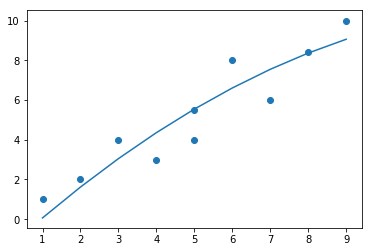

In [14]:
f = functools.partial(h, theta=theta_history[-1])
plt.scatter([i[0] for i in data], [i[1] for i in data])
plot_line(f, range(1,10), order_of_regression=2)
plt.show()

In [ ]:
update_features(9,2)

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 10000)
b,=plt.plot(range(len(cost_history_01)), cost_history_01, label='alpha=0.01')
c,=plt.plot(range(len(cost_history_001)), cost_history_001, label='alpha=0.001')
d,=plt.plot(range(len(cost_history_0001)), cost_history_0001, label='alpha=0.0001')
e,=plt.plot(range(len(cost_history_00001)), cost_history_00001 ,label='alpha=0.00001')
plt.legend(handles=[b, c, d, e])
plt.title("Effect of learning rate")
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 5000)
ax.set_ylim(0, 6000)
plt.plot(range(len(cost_history)), cost_history)
# plt.title("Optimum learning rate")
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
plt.show()

In [18]:
from IPython.core.display import display, HTML
fig, ax = plt.subplots()
x = []
y = []
plt.scatter([i[0] for i in data], [i[1] for i in data])
ln, = plt.plot(x, y, 'r--', animated=True, label='h(x)')
plt.title('Parameter Optimization with Feature scaling')

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend(handles=[ln])
    return ln,

def update(frame):
    theta = frame
    x = np.array(range(1, 10))
    f = functools.partial(h, theta=theta)
    y = [f(update_features(x_i, 2)) for x_i in x]
    ln.set_data(x, y)
    return ln,

def data_gen():
    for i in theta_history[::10]:
        yield i

ani = FuncAnimation(fig, update, frames=data_gen(),
                    init_func=init, blit=False, interval=100)
display(HTML(ani.to_html5_video()))

In [16]:
len(theta_history)

547

In [ ]:
from IPython.core.display import display, HTML
fig, ax = plt.subplots()
x = []
y = []
plt.scatter([i[0] for i in data], [i[1] for i in data])
ln, = plt.plot(x, y, 'r--', animated=True)
plt.title('Hypothesis Parameter Optimization for Linear Regression')

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    return ln,

def update(frame):
    theta_0 = frame[0]
    theta_1 = frame[1]
    x = np.array(range(10))
    f = functools.partial(h, theta_0=theta_0, theta_1=theta_1)
    y = f(x)
    ln.set_data(x, y)
    return ln,

def data_gen():
    for i, j in zip(theta_0_history[::300], theta_1_history[::300]):
        yield i, j

ani = FuncAnimation(fig, update, frames=data_gen(),
                    init_func=init, blit=False, interval=100)
display(HTML(ani.to_html5_video()))

In [ ]:
plt.show()